# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024
* Fernando Falkenberg INPE 09 Oct 2025

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to the files, which are sparc4-pipeline products.

In [2]:
path = '/media/fernando/KINGSTON/Doutorado/2025/reduced/'
date = '20250705'
object = 'V462Lup'
channel = '1'

In [3]:
db_example = f'{path}{date}/sparc4acs{channel}/{date}_sparc4acs{channel}_db.csv'
# Esse arquivo é uma tabela que contém informações de todas as imagens daquela noite, naquele canal, por exemplo, diretório, tempo de exposição, posição da lâmina, etc.

phot_lightcurve_example =f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_{object}_POLAR_L4_S+N_lc.fits'
# Esse arquivo contém várias tabelas dentro dele, uma pra cada abertura em que os dados do objeto foram processados. Dentro de cada tabela, estão informações de cada uma das fontes detectadas pelo pipeline, para cada imagem daquele objeto, por exemplo, RA, Dec, magnitude (com seu erro), fwhm, etc.

polar_stack_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_Gain2_1.0_Conventional_2_{object}_POLAR_L4_stack.fits'
# Esse arquivo contém várias tabelas dentro dele, duas para cada abertura em que os dados do objeto foram processados (sendo uma para o feixe ordinário e a outra para o feixe extraordinário). Cada tabela contém uma linha para cada fonte identificada pelo pipeline. Para cada linha, existem informações como RA, Dec, magnitude (com seu erro), fwhm, etc. É uma versão do arquivo logo acima, só que para apenas uma imagem stack.

polar_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_Gain2_1.0_Conventional_2_{object}_POLAR_L4_polar.fits'
# Esse arquivo contém várias tabelas, uma pra cada abertura em que os dados do objeto foram processados. Dentro de cada tabela existe uma linha para cada fonte detectada pelo pipeline. Em cada linha estão os resultados da polarimetria para aquela fonte, por exemplo, x1, y1, x2, y2, mag, emag, Q, U, V, P, theta, fwhm, zero, ezero, k, chi2, rms... Além disso, também estão as contagens para cada posição de lâmina, para cada fonte, para cada imagem, com seus erros. É nesse arquivo que estão os dados importantes.

polar_time_series_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_{object}_POLAR_L4_ts.fits'
# Esse arquivo contém uma tabela com os dados da série temporal polarimétrica das fontes detectadas pelo pipeline, por exemplo, RA, Dec, x1, y1, x2, y2, mag, emag, Q, U, V, P, theta, fwhm, zero, ezero, k, chi2, rms... O resultado aqui é para cada conjunto de uma medida polarimétrica.

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipeline` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [4]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T21:57:57.595000,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L2,None,True
1,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T21:58:48.715075,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L2,None,True
2,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T21:59:39.835151,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L2,None,True
3,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T22:00:30.955227,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L2,None,True
4,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T22:01:22.075303,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L2,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T08:59:01.233000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,12,L4,None,True
8857,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T08:59:43.709000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,13,L4,None,True
8858,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T09:00:26.286000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,14,L4,None,True
8859,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T09:01:08.913000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,15,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [5]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs1/20250705_s4c1_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     170   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.1

Then we plot the science frame using the `sparc4.product_plots` library

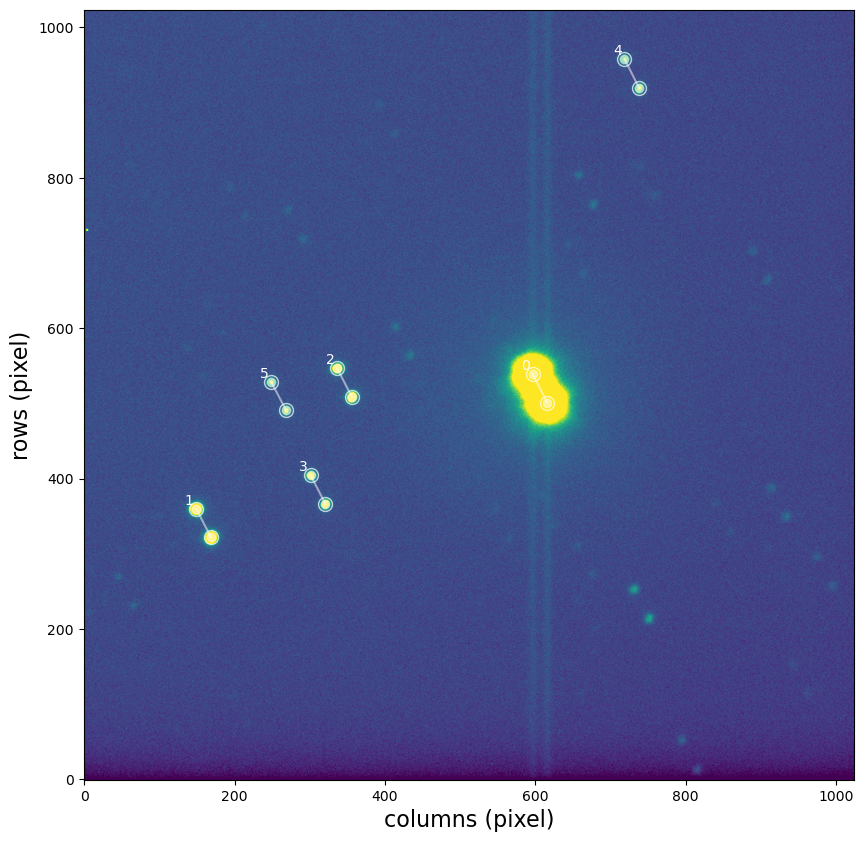

In [6]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [7]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,227.003239,-40.138812,615.901357,501.104167,8.761420,8.761420,-16.137954,0.001406,-14.304795,0.000191,10,0
1,1,227.057612,-40.156254,168.731388,321.683644,8.253841,8.253841,-11.752353,0.033599,-14.297748,0.000121,10,0
2,2,227.035220,-40.138498,356.004019,508.674592,8.708259,8.708259,-10.882170,0.073166,-14.298364,0.000119,10,0
3,3,227.039210,-40.151933,320.876271,366.238697,8.480665,8.480665,-10.270053,0.127456,-14.297834,0.000116,10,0
4,4,226.989166,-40.099482,738.097664,919.232489,9.095981,9.095981,-9.705656,0.213272,-14.296902,0.000115,10,0
5,5,227.045906,-40.140320,268.485828,490.835121,8.318263,8.318263,-9.684105,0.217624,-14.298057,0.000114,10,0


Below we select the source with its index number assigned as the main target to be analyzed. Then we select other stars as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

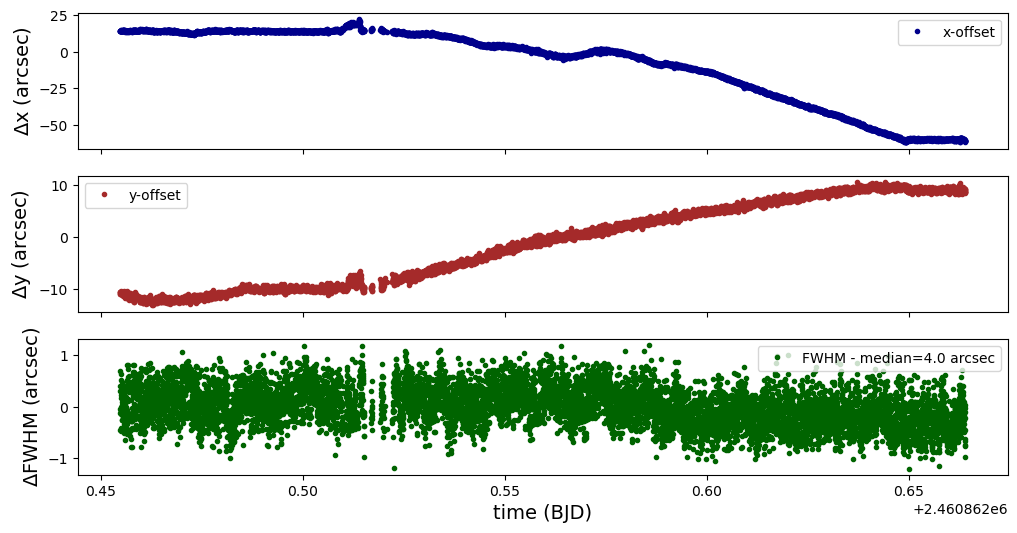

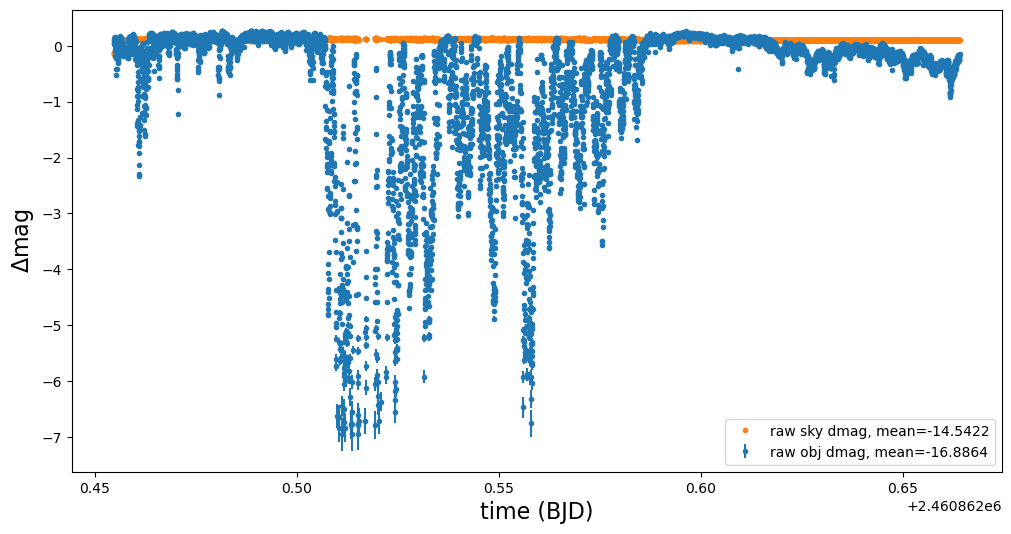

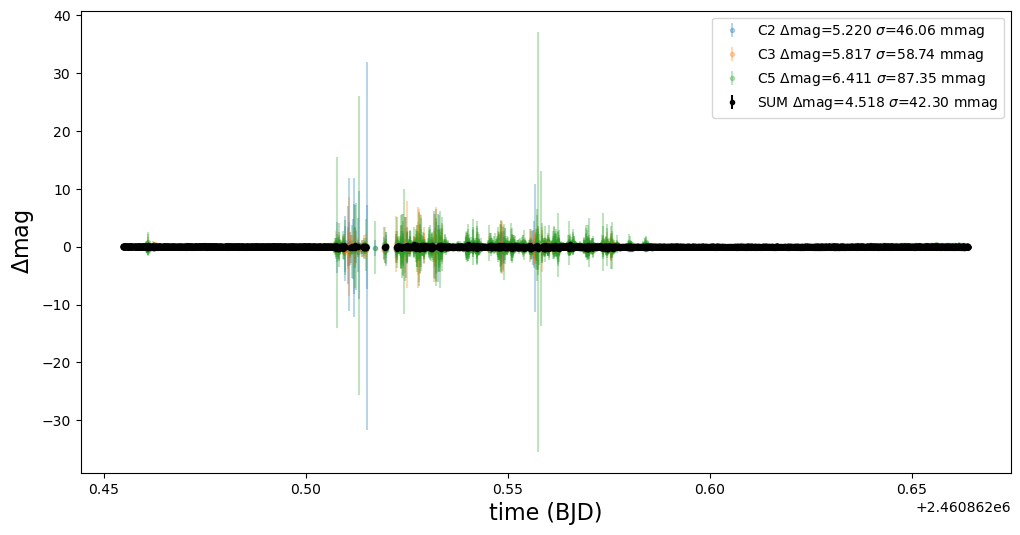

       TIME                x          ...       diffmagsum     
------------------ ------------------ ... ---------------------
2460862.4547881847  606.1154825585174 ...  0.040090649174456594
2460862.4548040405  606.6154825585174 ...  0.019537341436925537
2460862.4548370936  606.8654825585174 ...   0.06349589112462528
2460862.4548529494  606.8654825585174 ...   0.03297459476250442
2460862.4548846018  606.8654825585174 ...  0.025185133546359317
2460862.4549004575  607.1154825585174 ...  0.053100843096186345
 2460862.454932006  607.8654825585174 ...   0.03446415246933032
               ...                ... ...                   ...
2460862.6638821014 381.86548255851744 ... 0.0075899334400348906
2460862.6639153976 381.36548255851744 ...  -0.11142193615177387
2460862.6639306745 381.86548255851744 ... -0.009282958756883453
2460862.6639669677 382.36548255851744 ...  0.022057192229305578
 2460862.663982245 380.11548255851744 ...  -0.05457250159582383
2460862.6640132377 380.86548255851744 ..

In [8]:
catalog = 'CATALOG_PHOT_AP010'
target=0
comps=[2,3,5]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [9]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs1/20250705_s4c1_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU   50409   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU  67258   6R x 33623C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

,APERINDEX,APER,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,...,FE8394,EFE8394,FO8395,EFO8395,FE8395,EFE8395,FO8396,EFO8396,FE8396,EFE8396
0,2.0,10.0,0.0,227.003239,-40.138812,596.329608,539.145604,615.901357,501.104167,8.390248,...,2.757675e+06,4193.566771,2.513003e+06,4046.523709,2.693162e+06,4155.271795,2.600952e+06,4097.663785,2.799253e+06,4217.963248
1,2.0,10.0,1.0,227.057612,-40.156254,149.081165,359.686480,168.731388,321.683644,7.683218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,10.0,2.0,227.035220,-40.138498,336.417899,546.720939,356.004019,508.674592,7.484813,...,2.305838e+04,1942.378167,2.177237e+04,1943.141366,2.373476e+04,1942.740612,2.041955e+04,1934.986886,2.187783e+04,1939.942657
3,2.0,10.0,3.0,227.039210,-40.151933,301.318351,404.212365,320.876271,366.238697,7.399891,...,1.336938e+04,1928.276289,1.237546e+04,1928.975722,1.271145e+04,1929.498872,1.116208e+04,1923.573610,1.284123e+04,1926.446947
4,2.0,10.0,4.0,226.989166,-40.099482,718.588784,958.031502,738.097664,919.232489,7.662458,...,8.547603e+03,1921.752148,7.130077e+03,1814.639193,8.651124e+03,1922.405083,6.265821e+03,1835.312057,9.652755e+03,1922.649380
5,2.0,10.0,5.0,227.045906,-40.140320,248.741694,528.671257,268.485828,490.835121,7.516806,...,7.155139e+03,1918.761950,6.854984e+03,1922.576529,7.973357e+03,1924.741730,7.039828e+03,1917.519035,7.547459e+03,1920.411989


Then we can print all column names to check the data available in each catalog

In [11]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE8394', 'EFE8394', 'FO8395', 'EFO8395', 'FE8395', 'EFE8395', 'FO8396',
       'EFO8396', 'FE8396', 'EFE8396'],
      dtype='object', length=33623)

Finally, we can select the source of interest and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-10-09 17:20:13,775 astropop - INFO - Normalization disabled.  [__init__]


2025-10-09 17:20:13,775 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-10-09 17:20:14,136 root - INFO - Source index: i=0   [pipeline_lib]


2025-10-09 17:20:14,136 | INFO | Source index: i=0 


2025-10-09 17:20:14,140 root - INFO - Source RA=227.00323899508018 Dec=-40.138812191641264 mag=-26.70150+-0.00002  [pipeline_lib]


2025-10-09 17:20:14,140 | INFO | Source RA=227.00323899508018 Dec=-40.138812191641264 mag=-26.70150+-0.00002


2025-10-09 17:20:14,141 root - INFO - Best aperture radius: 20.0 pixels  [pipeline_lib]


2025-10-09 17:20:14,141 | INFO | Best aperture radius: 20.0 pixels


2025-10-09 17:20:14,142 root - INFO - Polarization in Q: -0.00540+-0.00007  [pipeline_lib]


2025-10-09 17:20:14,142 | INFO | Polarization in Q: -0.00540+-0.00007


2025-10-09 17:20:14,143 root - INFO - Polarization in U: -0.0006+-0.0001  [pipeline_lib]


2025-10-09 17:20:14,143 | INFO | Polarization in U: -0.0006+-0.0001


2025-10-09 17:20:14,143 root - INFO - Polarization in V: -0.00002+-0.00006  [pipeline_lib]


2025-10-09 17:20:14,143 | INFO | Polarization in V: -0.00002+-0.00006


2025-10-09 17:20:14,144 root - INFO - Total linear polarization p: 0.00543+-0.00007  [pipeline_lib]


2025-10-09 17:20:14,144 | INFO | Total linear polarization p: 0.00543+-0.00007


2025-10-09 17:20:14,145 root - INFO - Angle of polarization theta: 93.2+-0.4 deg  [pipeline_lib]


2025-10-09 17:20:14,145 | INFO | Angle of polarization theta: 93.2+-0.4 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-10-09 17:20:14,146 root - INFO - Free constant k: 0.9287570664482278+-0.0  [pipeline_lib]


2025-10-09 17:20:14,146 | INFO | Free constant k: 0.9287570664482278+-0.0


2025-10-09 17:20:14,148 root - INFO - Zero of polarization: 28.2+-0.0  [pipeline_lib]


2025-10-09 17:20:14,148 | INFO | Zero of polarization: 28.2+-0.0


2025-10-09 17:20:14,149 root - INFO - RMS of zi residuals: 0.011750280707023459  [pipeline_lib]


2025-10-09 17:20:14,149 | INFO | RMS of zi residuals: 0.011750280707023459


2025-10-09 17:20:14,150 root - INFO - Reduced chi-square (n=8394.0, DOF=8391.0): 10.35  [pipeline_lib]


2025-10-09 17:20:14,150 | INFO | Reduced chi-square (n=8394.0, DOF=8391.0): 10.35


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-10-09 17:20:14,461 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:20:14,461 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-09 17:20:14,465 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:20:14,465 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-09 17:20:14,725 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:20:14,725 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-09 17:20:14,731 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:20:14,731 | INFO | Substituting symbol \perp from STIXGeneral


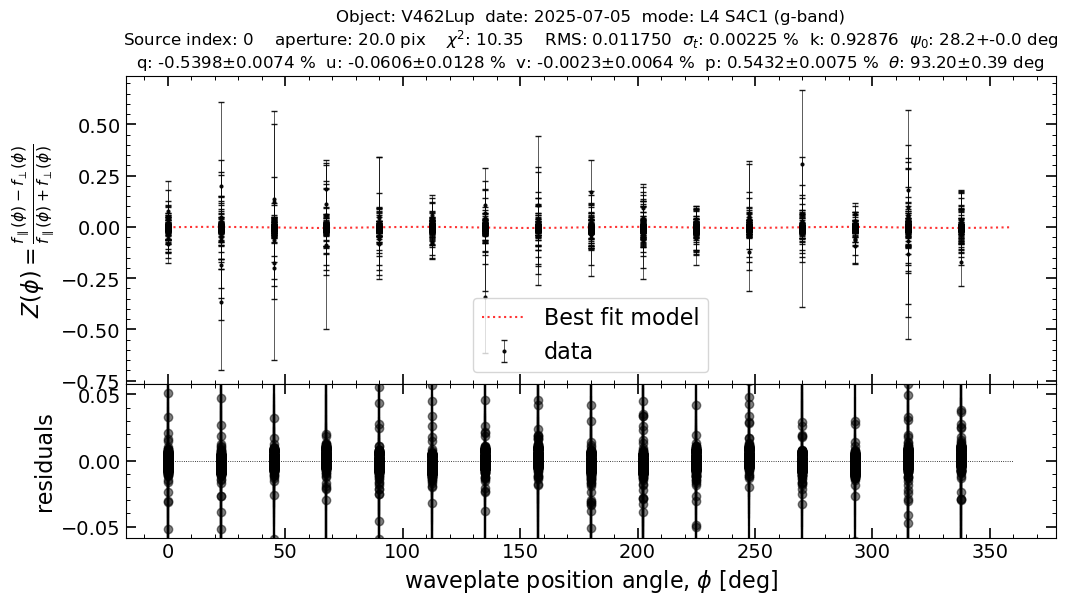

In [12]:
source_index = 0

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [13]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs1/20250705_s4c1_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits
SOURCE_INDEX : 0
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 6
APERTURE_RADIUS : 20.0
NEXPS : 8397
MAG : -26.70150+-0.00002
RA : 227.00323899508018
DEC : -40.138812191641264
FWHM : 8.390248020053985
X1 : 596.329607717587
Y1 : 539.1456040556544
X2 : 615.9013573994479
Y2 : 501.1041665412875
WAVEPLATE_ANGLES : [ 0.   0.  22.5 ...  0.  22.5 22.5]
ZI : [-0.0084+-0.0009, -0.0074+-0.0009, -0.0076+-0.0009, ..., 0.007+-0.001,
 0.004+-0.001, 0.004+-0.001]
FO : [3612000+-5000, 3676000+-5000, 3749000+-5000, ..., 2833000+-5000,
 2758000+-5000, 2845000+-5000]
FE : [3955000+-5000, 4017000+-5000, 4097000+-5000, ..., 3010000+-5000,
 2944000+-5000, 3041000+-6000]
OBSERVED_MODEL : [-1.91342643e-03 -1.91342643e-03 -7.13125361e-05 ... -1.91342643e-03
 -7.13125361e-05 -7.13125361e-05]
Q : -0.00540+-0.00007
U : -0.0006+-0.0001
V : -0.00002+-0.00006
P : 0.00543

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [14]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.543+-0.007 %  Angle of polarization: 93.2+-0.4 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [15]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [16]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

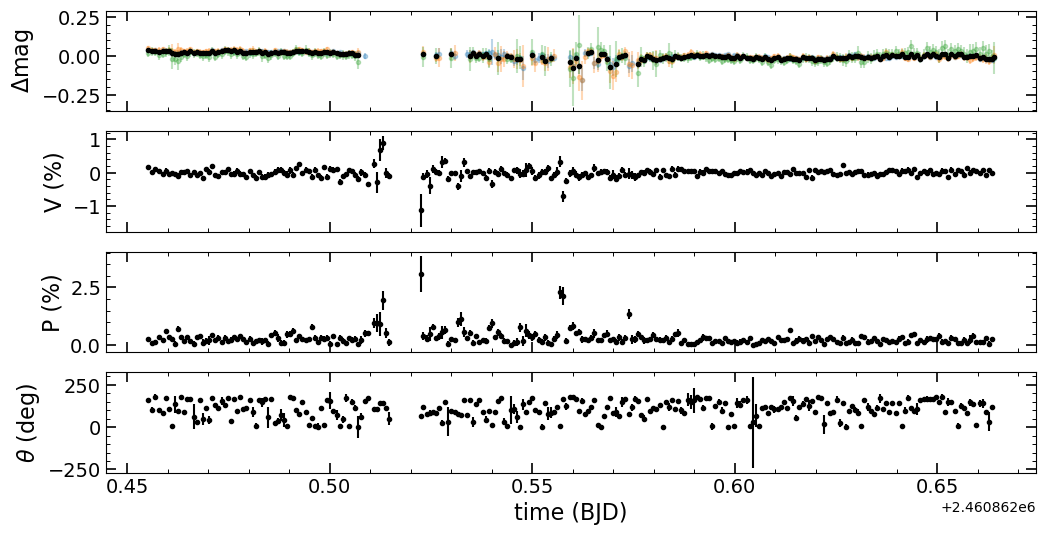

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.03838846289537656,0.009023855822673416,0.04966332001253271,0.015660290488690075,0.018022305420911877,0.026375539137537287,2460862.455158473,596.329607717587,539.1456040556544,615.9013573994479,501.1041665412875,8.385331791538118,-20.701726640362686,0.00017271034354942284,-16.14893971224561,0.03197271102527917,0.03707707295043239,0.00265814835973701,0.0008537270222205518,160.7338743609105,9.185564359516597
0.030131728390495383,0.008829235231996793,0.03872280818647411,0.015281399201850317,0.028368651879382867,0.026241352126887222,2460862.456011685,597.579607717587,538.1456040556544,617.1513573994479,500.1041665412875,8.266871648127122,-20.71697373443203,0.00017125892996254166,-16.169982671315374,0.0316227312060843,0.031281207950013545,0.0009056730853664275,0.0006334022597436098,102.0261489951317,20.002034863758755
0.036818611763902,0.00854461102661042,0.03807981041123476,0.014683438204676194,0.022239564141870005,0.02508758530296743,2460862.456783722,595.329607717587,537.8956040556544,614.9013573994479,499.8541665412875,9.000635117809647,-20.756233548411526,0.00016757596171302125,-16.20700433185297,0.030297135612652428,0.03351936139191114,0.0014046898068493213,0.0007855643724983524,179.29832020859217,15.994378932560226
0.026462999803515075,0.011276485454317024,0.04004727149654208,0.019647549060055797,0.004632416165273767,0.03301383276795782,2460862.457725499,597.579607717587,538.1456040556544,617.1513573994479,500.1041665412875,8.235849879908578,-20.70075501240005,0.00019670646317847013,-16.159462273612956,0.0400372624189197,0.025582883620452357,0.003558401665892126,0.0007834070275031398,102.80026068812246,6.2964901352620455
0.03774333102704297,0.009645846395943805,0.042392445838137505,0.01664220376455734,0.015154799948856379,0.028151361500784622,2460862.4586630343,595.829607717587,536.3956040556544,615.4013573994479,498.3541665412875,8.635288527053692,-20.860011017734045,0.00018033809843487998,-16.310248921900182,0.03409408875001363,0.03405224066721946,0.002195438397394287,0.0007845475430235492,81.12899217127105,10.220309418430826
0.03312558057189818,0.009867955501043623,0.028618936656133798,0.016888782412540323,0.023313887523478627,0.029152704497788468,2460862.4594294466,596.829607717587,535.8956040556544,616.4013573994479,497.8541665412875,8.828842765981687,-20.830472281593842,0.00018328284328460322,-16.285843877059836,0.03510536880424641,0.028918549367362267,0.006193681785040854,0.0009740151816917483,170.19310210057654,4.497621150583579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.0015480163432002314,0.01369786147413401,-0.00892095809266813,0.023435400025675443,0.04383015915956712,0.04272355938907942,2460862.6597143374,374.329607717587,598.8956040556544,393.9013573994479,560.8541665412874,7.44639723020399,-20.438916092966007,0.000228194133506809,-15.92039668057723,0.05061616038887668,0.0028095572221333853,0.00138584333544326,0.0005270253232422092,10.207734551118806,10.876355111168559
-0.023095409394993993,0.014244737804130839,-0.014187814144925426,0.02474321858653733,0.015227905727748237,0.04416002962807412,2460862.6604837063,374.579607717587,598.8956040556544,394.1513573994479,560.8541665412874,7.426190423127319,-20.374133383149427,0.00023682284150978279,-15.873394066508673,0.0525840221237136,-0.014970538525889587,0.0012541674455241296,0.0009862079905179476,140.70706054393352,22.489459943704656


In [17]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=0, 
                             comps=[2,3,5], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)